# LEARNED LAYER

here we bring together all the LearnedLayerAwesomeness. 
1. optimization
2. experiment runner that shows details of the run 
3. reporting results 


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=0)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style>')



# 1. Optimisation

In [2]:
from moleLearnedLayer import optimize


optimize.init(aid="1834",size=100,repeats=2)
optimize.run(typ=1, num_tries=20) 
optimize.report()



lol


# 2. Detailed Training on optimized parameters

In [ ]:
make_sampler(parameters, typ=1)
sample(aid,size)


# 3. Report Results

In [2]:

from eden_chem.io.pubchem import download
from eden_chem.io.rdkitutils import sdf_to_nx 
get_graphs_pos = lambda aid: list(sdf_to_nx( download(aid ,active=True ,stepsize=75) ))
get_graphs_neg = lambda aid: list(sdf_to_nx( download(aid ,active=False,stepsize=75) ))

import sys
from eden.graph import vectorize as vecze
print sum([ sys.getsizeof(G.edge) + sys.getsizeof(G.node) for G in get_graphs_pos("1834")])
print sum([a.data.nbytes for a in vecze(get_graphs_pos("1834"))]  )




from graphlearn01 import estimate as glesti
import graphlearn01.learnedlayer.cascade as cascade
from graphlearn01.minor import decompose
from graphlearn01.utils import  draw
from graphlearn01 import graphlearn as glearn
import random 


class output_corrected_graphlearn(glearn.Sampler):
    def _return_formatter(self, graphlist, mon):
        for e in graphlist:
            yield e

def getsampler():
    mycascade = cascade.Cascade(
        depth=2,
        debug=False,
        group_score_threshold=-.2,
        multiprocess=True,
        max_group_size=6,
        min_group_size=2, 
        num_classes=2) 
    return  output_corrected_graphlearn(decomposer= decompose.MinorDecomposer(),graphtransformer= mycascade,n_steps=20)


def fitsampler(sampler,pos,neg):
    # make pos/neg decomposers
    decomposers_n = [sampler.decomposer.make_new_decomposer(data)
                     for data in sampler.graph_transformer.fit_transform(neg)]
    
    sampler.graph_transformer.toggledebug()
    decomposers_p = [sampler.decomposer.make_new_decomposer(data)
                   for data in sampler.graph_transformer.fit_transform(pos)]
    # fit grammar
    sampler.fit_grammar(decomposers_p+decomposers_n)

    # fit estimator
    sampler.estimator= glesti.TwoClassEstimator()
    sampler.fit_estimator(decomposers_p,negative_decomposers=decomposers_n)



Reading from file: PUBCHEM/AID1834_active.sdf
Reading from file: PUBCHEM/AID1834_inactive.sdf
minortransform_fit


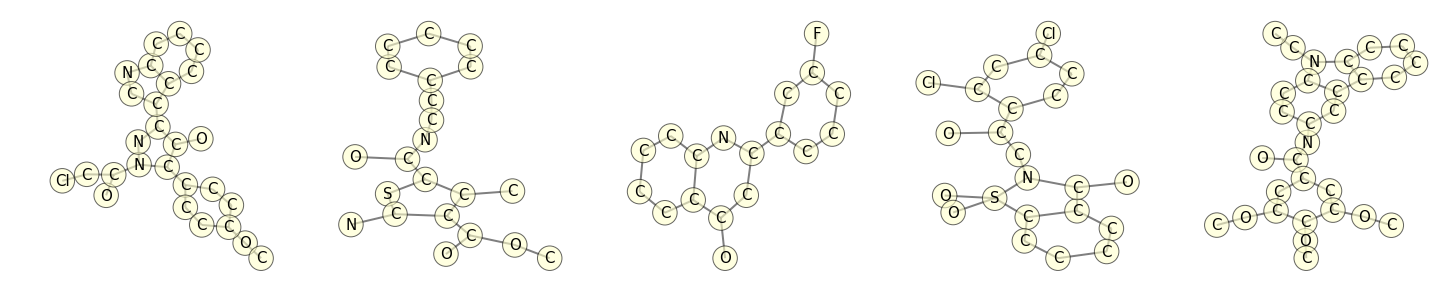

minortransform_scores


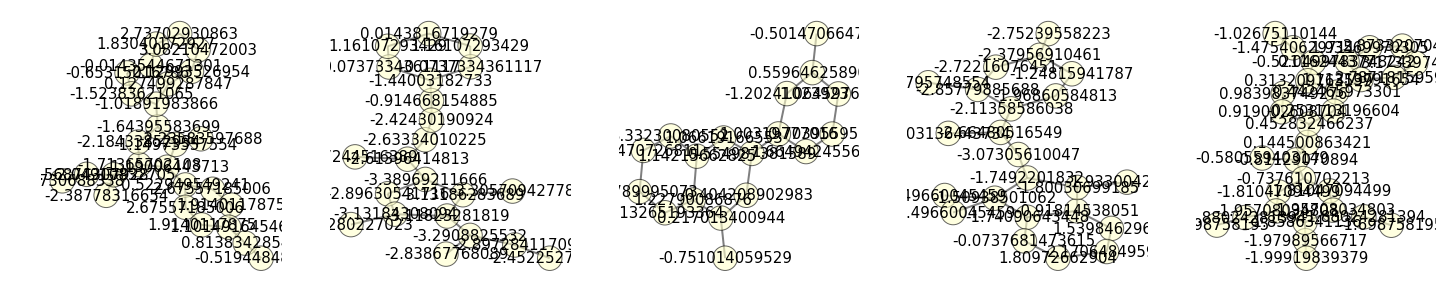

num clusters: 3
class: 0 count:6 (0.20)
class: 1 count:3 (0.10)
class: 2 count:4 (0.13)
class: 3 count:2 (0.07)
class: -1 count:15 (0.50)

cluster: 0  len 6


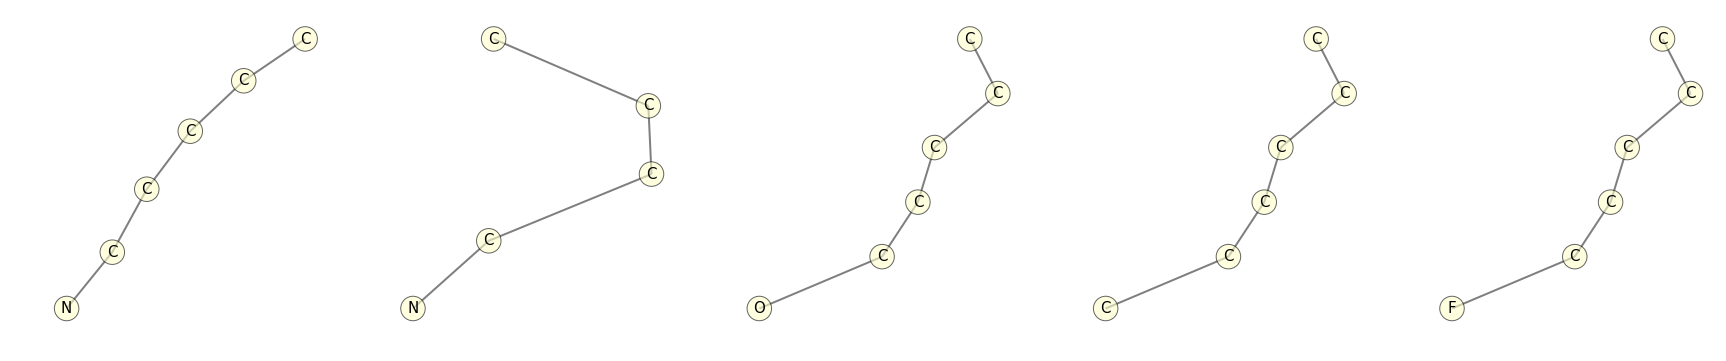

cluster: 1  len 3


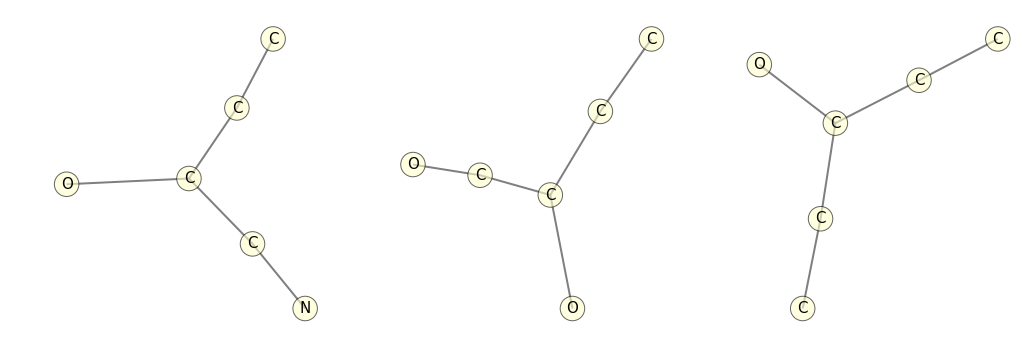

cluster: 2  len 4


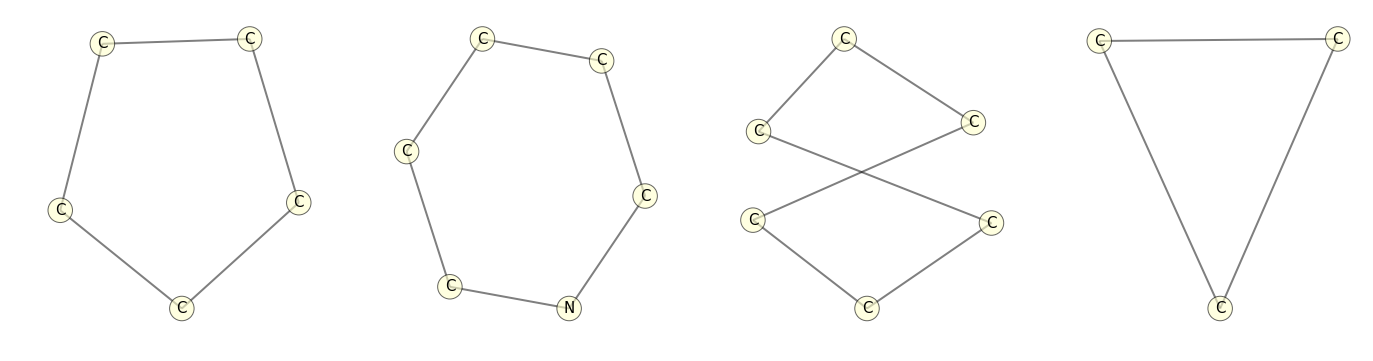

cluster: 3  len 2


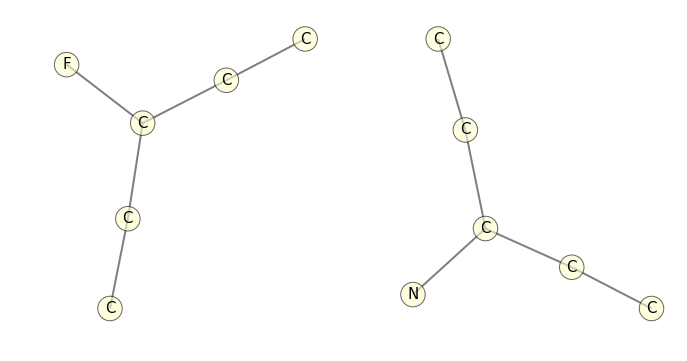

cluster: -1  len 15


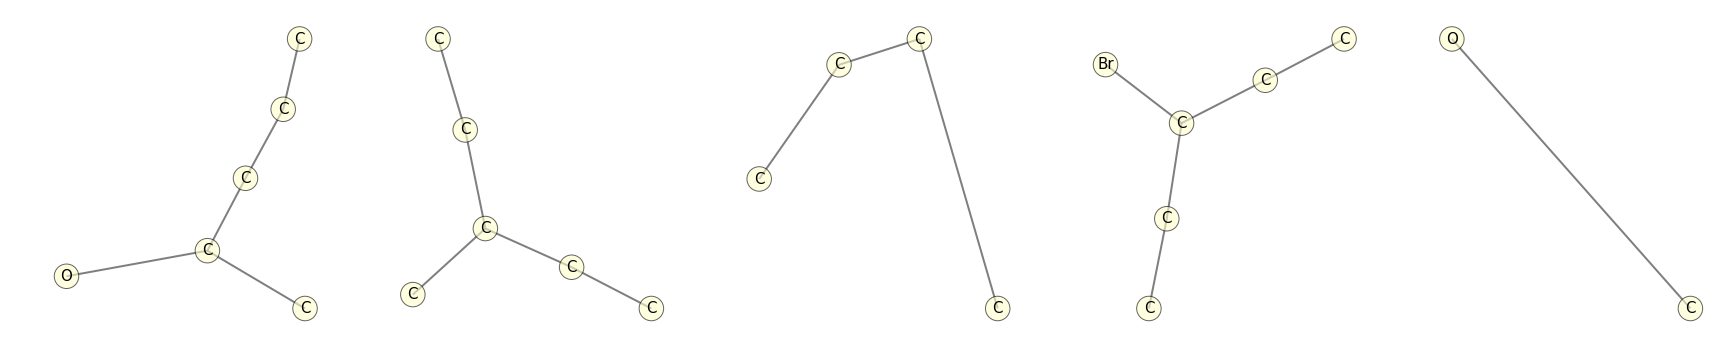

minortransform_fit


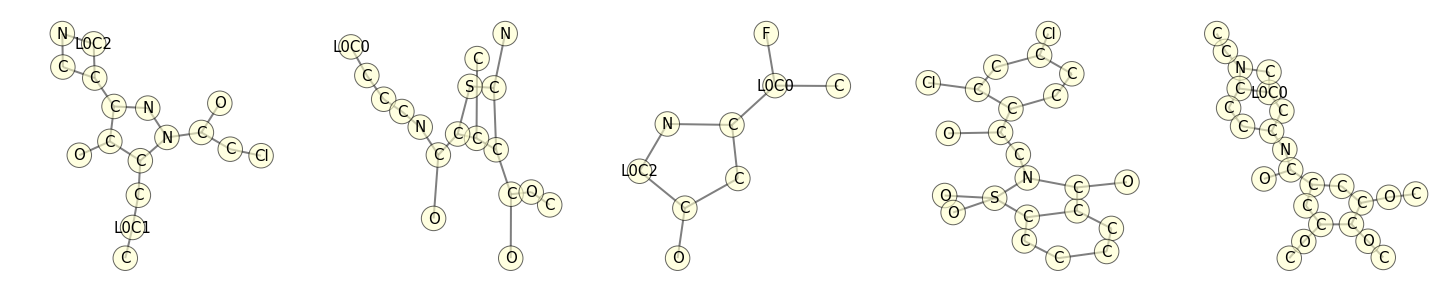

minortransform_scores


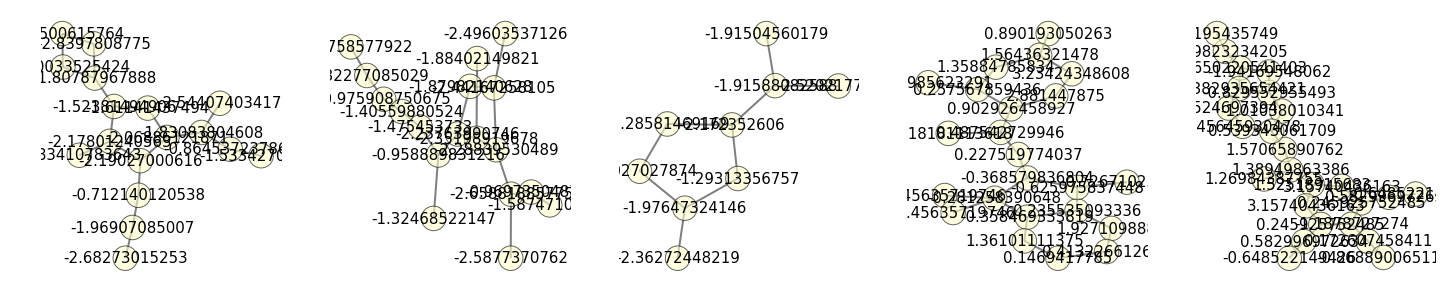

num clusters: 4
class: 0 count:7 (0.10)
class: 1 count:16 (0.24)
class: 2 count:7 (0.10)
class: 3 count:2 (0.03)
class: 4 count:2 (0.03)
class: -1 count:33 (0.49)

cluster: 0  len 7


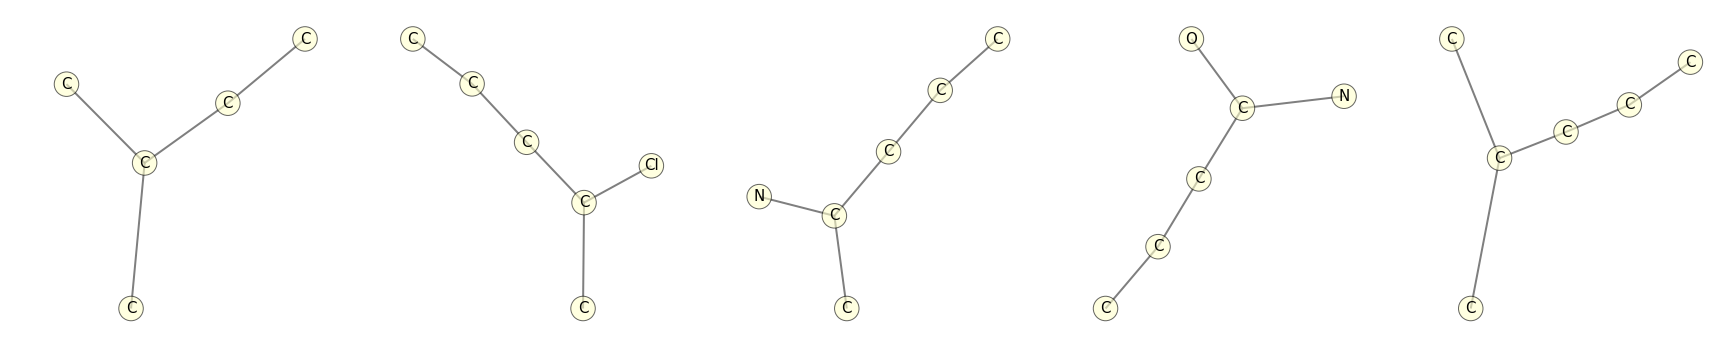

cluster: 1  len 16


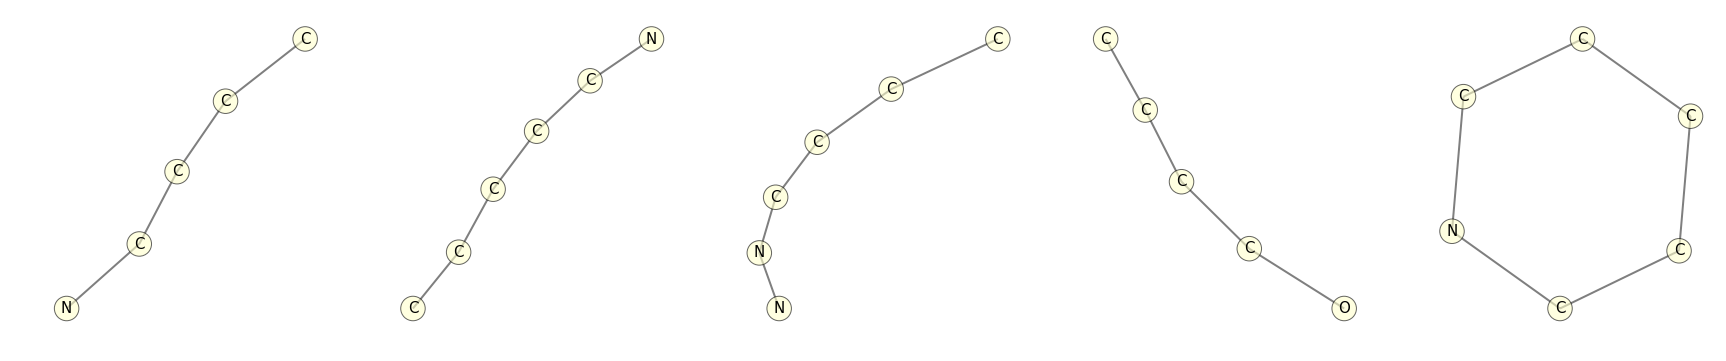

cluster: 2  len 7


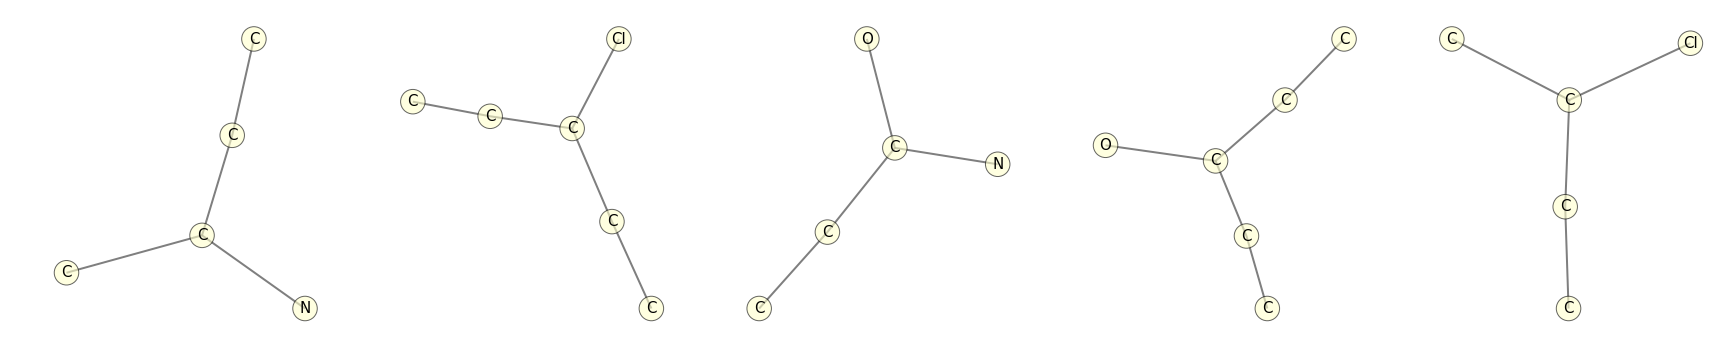

cluster: 3  len 2


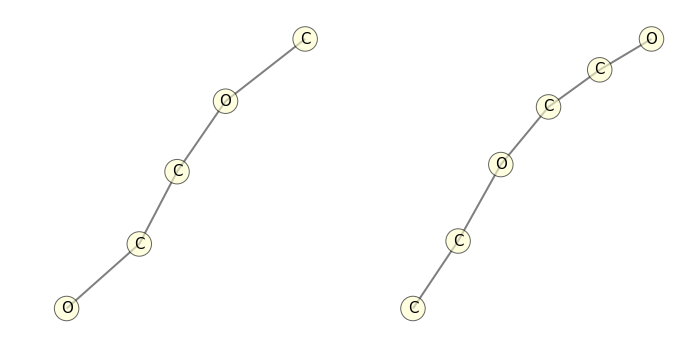

cluster: 4  len 2


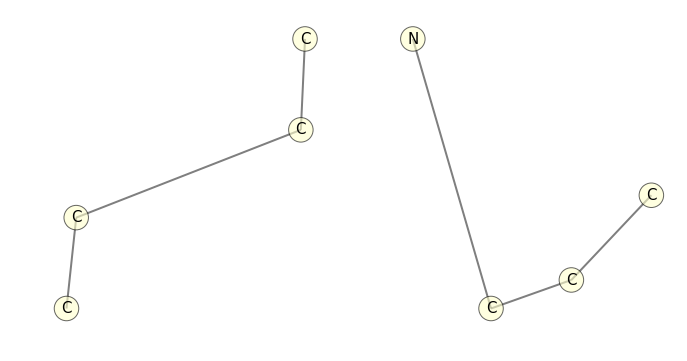

cluster: -1  len 33


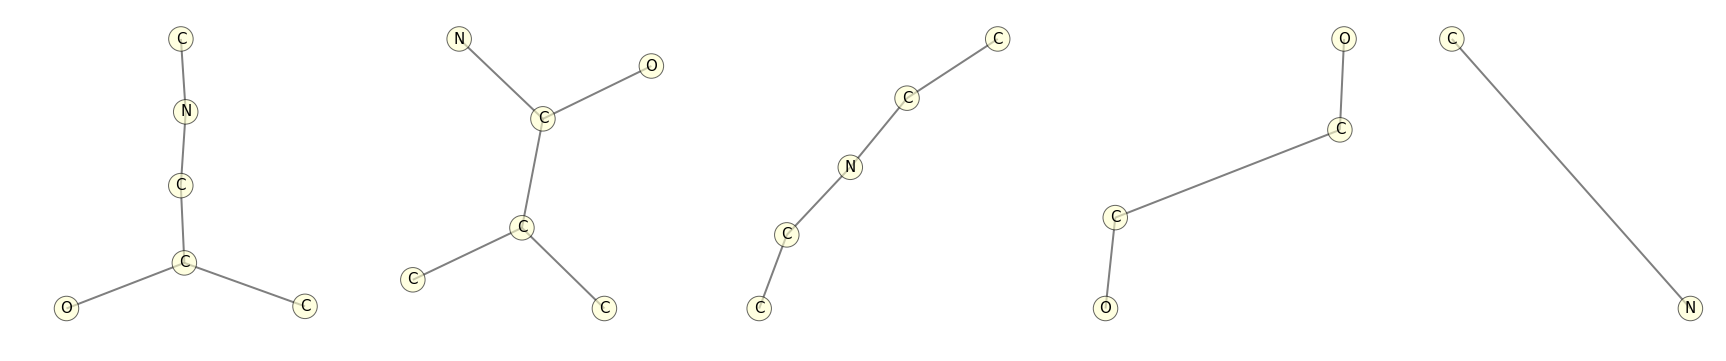

#instances: 300  #interfaces: 286   #cores: 194   #core-interface-pairs: 1190
CPU times: user 1min 19s, sys: 1min 28s, total: 2min 48s
Wall time: 1min 20s


In [3]:
%%time
from copy import deepcopy
AID="1834"
pos=random.sample( get_graphs_pos(AID), 200)
neg=random.sample( get_graphs_neg(AID), 100)


sampler=getsampler()


fitsampler(sampler,deepcopy(pos),deepcopy(neg))



In [4]:
graphs= list(sampler.transform(deepcopy(pos)))

'''PLAN
load sdf
fit with DEBUG 
RUN 
print average score, average score of seeds, result with unlayered thing
'''

preprocessing grammar
processing a grpah:




_propose_graph: step 0; core 0/36; original_cips tried  0; size 57; last_score 0.7602
_propose_graph: step 1; core 0/13; original_cips tried  0; size 57; last_score 0.7384
_propose_graph: step 2; core 0/2; original_cips tried  0; size 57; last_score 0.7075
_propose_graph: step 3; core 0/4; original_cips tried  0; size 59; last_score 0.6958
_propose_graph: step 4; core 0/2; original_cips tried  0; size 65; last_score 0.5274
_propose_graph: step 5; core 0/48; original_cips tried  0; size 67; last_score 0.5652
_propose_graph: step 6; core 0/3; original_cips tried  0; size 67; last_score 0.6515
_propose_graph: step 7; core 0/17; original_cips tried  0; size 65; last_score 0.6434
_propose_graph: step 8; core 0/17; original_cips tried  0; size 65; last_score 0.5774
_propose_graph: step 9; core 0/3; original_cips tried  0; size 61; last_score 0.4972
_propose_graph: step 10; core 0/8; original_cips tried  0; size 50; last_score 0.4293
_propose_grap

_propose_graph: step 14; core 0/1; original_cips tried  0; size 75; last_score 0.6186
_propose_graph: step 15; core 0/54; original_cips tried  0; size 75; last_score 0.6467
_propose_graph: step 16; core 0/3; original_cips tried  0; size 75; last_score 0.6467
_propose_graph: step 17; core 0/12; original_cips tried  0; size 75; last_score 0.6467
_propose_graph: step 18; core 0/12; original_cips tried  0; size 88; last_score 0.7111
_propose_graph: step 19; core 0/12; original_cips tried  0; size 88; last_score 0.7111
processing a grpah:




_propose_graph: step 0; core 0/48; original_cips tried  0; size 60; last_score 0.6460
_propose_graph: step 1; core 0/6; original_cips tried  0; size 56; last_score 0.5541
_propose_graph: step 2; core 0/54; original_cips tried  0; size 56; last_score 0.5088
_propose_graph: step 3; core 0/4; original_cips tried  0; size 54; last_score 0.4847
_propose_graph: step 4; core 0/48; original_cips tried  0; size 58; last_score 0.5263
_propose_graph: step 5; core

_propose_graph: step 8; core 0/3; original_cips tried  0; size 46; last_score 0.5479
_propose_graph: step 9; core 0/4; original_cips tried  0; size 46; last_score 0.5479
_propose_graph: step 10; core 0/3; original_cips tried  0; size 46; last_score 0.5479
_propose_graph: step 11; core 0/48; original_cips tried  0; size 46; last_score 0.5334
_propose_graph: step 12; core 0/15; original_cips tried  0; size 46; last_score 0.5612
_propose_graph: step 13; core 0/54; original_cips tried  0; size 46; last_score 0.5612
_propose_graph: step 14; core 0/3; original_cips tried  0; size 46; last_score 0.5961
_propose_graph: step 15; core 0/34; original_cips tried  0; size 50; last_score 0.5748
_propose_graph: step 16; core 0/6; original_cips tried  0; size 50; last_score 0.5748
_propose_graph: step 17; core 0/21; original_cips tried  0; size 48; last_score 0.6977
_propose_graph: step 18; core 0/48; original_cips tried  0; size 48; last_score 0.6977
_propose_graph: step 19; core 0/15; original_cips 

_propose_graph: step 2; core 0/1; original_cips tried  0; size 37; last_score 0.3506
_propose_graph: step 3; core 0/5; original_cips tried  0; size 37; last_score 0.5834
_propose_graph: step 4; core 0/15; original_cips tried  0; size 37; last_score 0.5834
_propose_graph: step 5; core 0/1; original_cips tried  0; size 37; last_score 0.5834
_propose_graph: step 6; core 0/54; original_cips tried  0; size 37; last_score 0.5059
_propose_graph: step 7; core 0/1; original_cips tried  0; size 37; last_score 0.5965
_propose_graph: step 8; core 0/1; original_cips tried  0; size 37; last_score 0.5965
_propose_graph: step 9; core 0/5; original_cips tried  0; size 37; last_score 0.5965
_propose_graph: step 10; core 0/6; original_cips tried  0; size 37; last_score 0.5965
_propose_graph: step 11; core 0/6; original_cips tried  0; size 35; last_score 0.7469
_propose_graph: step 12; core 0/1; original_cips tried  0; size 35; last_score 0.8096
_propose_graph: step 13; core 0/6; original_cips tried  0; s

_propose_graph: step 17; core 0/6; original_cips tried  0; size 98; last_score 0.6013
_propose_graph: step 18; core 0/3; original_cips tried  0; size 98; last_score 0.6013
_propose_graph: step 19; core 0/12; original_cips tried  0; size 98; last_score 0.6013
processing a grpah:




_propose_graph: step 0; core 0/54; original_cips tried  0; size 50; last_score 0.7678
_propose_graph: step 1; core 0/54; original_cips tried  0; size 56; last_score 0.7482
_propose_graph: step 2; core 0/26; original_cips tried  0; size 54; last_score 0.8062
_propose_graph: step 3; core 0/6; original_cips tried  0; size 52; last_score 0.8370
_propose_graph: step 4; core 0/34; original_cips tried  0; size 52; last_score 0.8370
_propose_graph: step 5; core 0/48; original_cips tried  0; size 37; last_score 0.7545
_propose_graph: step 6; core 0/48; original_cips tried  0; size 33; last_score 0.7119
_propose_graph: step 7; core 0/5; original_cips tried  0; size 39; last_score 0.7854
_propose_graph: step 8; core 0/

_propose_graph: step 11; core 0/54; original_cips tried  0; size 43; last_score 0.7759
_propose_graph: step 12; core 0/11; original_cips tried  0; size 43; last_score 0.7759
_propose_graph: step 13; core 0/1; original_cips tried  0; size 47; last_score 0.8665
_propose_graph: step 14; core 0/54; original_cips tried  0; size 47; last_score 0.8665
_propose_graph: step 15; core 0/48; original_cips tried  0; size 47; last_score 0.8665
_propose_graph: step 16; core 0/1; original_cips tried  0; size 47; last_score 0.8665
_propose_graph: step 17; core 0/54; original_cips tried  0; size 47; last_score 0.8665
_propose_graph: step 18; core 0/13; original_cips tried  0; size 60; last_score 0.8829
_propose_graph: step 19; core 0/54; original_cips tried  0; size 60; last_score 0.8829
processing a grpah:




_propose_graph: step 0; core 0/54; original_cips tried  0; size 46; last_score 0.8370
_propose_graph: step 1; core 0/3; original_cips tried  0; size 44; last_score 0.8103
_propose_graph: step 2; 

_propose_graph: step 4; core 0/17; original_cips tried  0; size 48; last_score 0.7225
_propose_graph: step 5; core 0/11; original_cips tried  0; size 46; last_score 0.7984
_propose_graph: step 6; core 0/11; original_cips tried  0; size 52; last_score 0.7450
_propose_graph: step 7; core 0/15; original_cips tried  0; size 50; last_score 0.7461
_propose_graph: step 8; core 0/54; original_cips tried  0; size 50; last_score 0.7461
_propose_graph: step 9; core 0/54; original_cips tried  0; size 50; last_score 0.8264
_propose_graph: step 10; core 0/13; original_cips tried  0; size 46; last_score 0.7975
_propose_graph: step 11; core 0/54; original_cips tried  0; size 46; last_score 0.7975
_propose_graph: step 12; core 0/13; original_cips tried  0; size 46; last_score 0.7975
_propose_graph: step 13; core 0/17; original_cips tried  0; size 46; last_score 0.7975
_propose_graph: step 14; core 0/1; original_cips tried  0; size 50; last_score 0.7700
_propose_graph: step 15; core 0/10; original_cips 

_propose_graph: step 19; core 0/8; original_cips tried  0; size 62; last_score 0.3988
processing a grpah:




_propose_graph: step 0; core 0/5; original_cips tried  0; size 54; last_score 0.1093
_propose_graph: step 1; core 0/1; original_cips tried  0; size 56; last_score 0.1621
_propose_graph: step 2; core 0/17; original_cips tried  0; size 56; last_score 0.1762
_propose_graph: step 3; core 0/54; original_cips tried  0; size 56; last_score 0.1762
_propose_graph: step 4; core 0/3; original_cips tried  0; size 54; last_score 0.2062
_propose_graph: step 5; core 0/1; original_cips tried  0; size 48; last_score 0.3934
_propose_graph: step 6; core 0/17; original_cips tried  0; size 50; last_score 0.4513
_propose_graph: step 7; core 0/34; original_cips tried  0; size 52; last_score 0.3686
_propose_graph: step 8; core 0/2; original_cips tried  0; size 52; last_score 0.3704
_propose_graph: step 9; core 0/3; original_cips tried  0; size 52; last_score 0.3704
_propose_graph: step 10; core 0/17; 

_propose_graph: step 13; core 0/36; original_cips tried  0; size 84; last_score 0.7267
_propose_graph: step 14; core 0/36; original_cips tried  0; size 80; last_score 0.7761
_propose_graph: step 15; core 0/34; original_cips tried  0; size 80; last_score 0.7761
_propose_graph: step 16; core 0/34; original_cips tried  0; size 78; last_score 0.7766
_propose_graph: step 17; core 0/54; original_cips tried  0; size 76; last_score 0.7248
_propose_graph: step 18; core 0/54; original_cips tried  0; size 76; last_score 0.7248
_propose_graph: step 19; core 0/48; original_cips tried  0; size 76; last_score 0.7556
processing a grpah:




_propose_graph: step 0; core 0/34; original_cips tried  0; size 70; last_score 0.0866
_propose_graph: step 1; core 0/34; original_cips tried  0; size 83; last_score 0.1155
_propose_graph: step 2; core 0/6; original_cips tried  0; size 85; last_score 0.1365
_propose_graph: step 3; core 0/54; original_cips tried  0; size 91; last_score 0.2225
_propose_graph: step 4; 

_propose_graph: step 7; core 0/12; original_cips tried  0; size 48; last_score 0.3177
_propose_graph: step 8; core 0/17; original_cips tried  0; size 52; last_score 0.4603
_propose_graph: step 9; core 0/5; original_cips tried  0; size 52; last_score 0.4603
_propose_graph: step 10; core 0/48; original_cips tried  0; size 52; last_score 0.4603
_propose_graph: step 11; core 0/1; original_cips tried  0; size 52; last_score 0.4603
_propose_graph: step 12; core 0/8; original_cips tried  0; size 52; last_score 0.4603
_propose_graph: step 13; core 0/12; original_cips tried  0; size 52; last_score 0.4603
_propose_graph: step 14; core 0/3; original_cips tried  0; size 58; last_score 0.5295
_propose_graph: step 15; core 0/7; original_cips tried  0; size 60; last_score 0.4762
_propose_graph: step 16; core 0/6; original_cips tried  0; size 60; last_score 0.4762
_propose_graph: step 17; core 0/36; original_cips tried  0; size 73; last_score 0.5323
_propose_graph: step 18; core 0/54; original_cips tr

_propose_graph: step 1; core 0/1; original_cips tried  0; size 48; last_score 0.8221
_propose_graph: step 2; core 0/54; original_cips tried  0; size 48; last_score 0.8383
_propose_graph: step 3; core 0/6; original_cips tried  0; size 48; last_score 0.8372
_propose_graph: step 4; core 0/1; original_cips tried  0; size 42; last_score 0.8142
_propose_graph: step 5; core 0/6; original_cips tried  0; size 44; last_score 0.6131
_propose_graph: step 6; core 0/36; original_cips tried  0; size 44; last_score 0.6131
_propose_graph: step 7; core 0/1; original_cips tried  0; size 48; last_score 0.6635
_propose_graph: step 8; core 0/2; original_cips tried  0; size 50; last_score 0.6260
_propose_graph: step 9; core 0/1; original_cips tried  0; size 50; last_score 0.6260
_propose_graph: step 10; core 0/7; original_cips tried  0; size 50; last_score 0.7310
_propose_graph: step 11; core 0/12; original_cips tried  0; size 50; last_score 0.7310
_propose_graph: step 12; core 0/1; original_cips tried  0; s

_propose_graph: step 16; core 0/54; original_cips tried  0; size 68; last_score 0.6016
_propose_graph: step 17; core 0/12; original_cips tried  0; size 79; last_score 0.7461
_propose_graph: step 18; core 0/6; original_cips tried  0; size 79; last_score 0.7461
_propose_graph: step 19; core 0/26; original_cips tried  0; size 79; last_score 0.7461
processing a grpah:




_propose_graph: step 0; core 0/1; original_cips tried  0; size 48; last_score 0.9432
_propose_graph: step 1; core 0/48; original_cips tried  0; size 61; last_score 0.9237
_propose_graph: step 2; core 0/54; original_cips tried  0; size 59; last_score 0.8782
_propose_graph: step 3; core 0/3; original_cips tried  0; size 59; last_score 0.8543
_propose_graph: step 4; core 0/36; original_cips tried  0; size 69; last_score 0.9033
_propose_graph: step 5; core 0/7; original_cips tried  0; size 69; last_score 0.9033
_propose_graph: step 6; core 0/3; original_cips tried  0; size 69; last_score 0.9033
_propose_graph: step 7; core 0/

_propose_graph: step 10; core 0/36; original_cips tried  0; size 33; last_score 0.3151
_propose_graph: step 11; core 0/26; original_cips tried  0; size 31; last_score 0.4350
_propose_graph: step 12; core 0/2; original_cips tried  0; size 31; last_score 0.4350
_propose_graph: step 13; core 0/26; original_cips tried  0; size 35; last_score 0.4901
_propose_graph: step 14; core 0/3; original_cips tried  0; size 35; last_score 0.4901
_propose_graph: step 15; core 0/48; original_cips tried  0; size 43; last_score 0.6804
_propose_graph: step 16; core 0/48; original_cips tried  0; size 43; last_score 0.6804
_propose_graph: step 17; core 0/3; original_cips tried  0; size 43; last_score 0.6804
_propose_graph: step 18; core 0/2; original_cips tried  0; size 43; last_score 0.6804
_propose_graph: step 19; core 0/36; original_cips tried  0; size 39; last_score 0.7024
processing a grpah:




_propose_graph: step 0; core 0/3; original_cips tried  0; size 54; last_score 0.1656
_propose_graph: step 1; c

_propose_graph: step 4; core 0/54; original_cips tried  0; size 64; last_score 0.3069
_propose_graph: step 5; core 0/1; original_cips tried  0; size 66; last_score 0.4002
_propose_graph: step 6; core 0/21; original_cips tried  0; size 66; last_score 0.4464
_propose_graph: step 7; core 0/3; original_cips tried  0; size 66; last_score 0.4464
_propose_graph: step 8; core 0/1; original_cips tried  0; size 66; last_score 0.8023
_propose_graph: step 9; core 0/6; original_cips tried  0; size 66; last_score 0.8023
_propose_graph: step 10; core 0/34; original_cips tried  0; size 66; last_score 0.8023
_propose_graph: step 11; core 0/12; original_cips tried  0; size 64; last_score 0.7961
_propose_graph: step 12; core 0/54; original_cips tried  0; size 64; last_score 0.7961
_propose_graph: step 13; core 0/54; original_cips tried  0; size 64; last_score 0.7961
_propose_graph: step 14; core 0/11; original_cips tried  0; size 70; last_score 0.8301
_propose_graph: step 15; core 0/11; original_cips tri

_propose_graph: step 19; core 0/6; original_cips tried  0; size 59; last_score 0.7894
processing a grpah:




_propose_graph: step 0; core 0/54; original_cips tried  0; size 52; last_score 0.2371
_propose_graph: step 1; core 0/54; original_cips tried  0; size 48; last_score 0.2976
_propose_graph: step 2; core 0/1; original_cips tried  0; size 42; last_score 0.2879
_propose_graph: step 3; core 0/12; original_cips tried  0; size 48; last_score 0.2877
_propose_graph: step 4; core 0/5; original_cips tried  0; size 52; last_score 0.3690
_propose_graph: step 5; core 0/54; original_cips tried  0; size 56; last_score 0.3864
_propose_graph: step 6; core 0/5; original_cips tried  0; size 58; last_score 0.5186
_propose_graph: step 7; core 0/4; original_cips tried  0; size 60; last_score 0.5970
_propose_graph: step 8; core 0/5; original_cips tried  0; size 54; last_score 0.6028
_propose_graph: step 9; core 0/26; original_cips tried  0; size 54; last_score 0.6028
_propose_graph: step 10; core 0/54;

_propose_graph: step 13; core 0/12; original_cips tried  0; size 38; last_score 0.9111
_propose_graph: step 14; core 0/5; original_cips tried  0; size 38; last_score 0.9111
_propose_graph: step 15; core 0/54; original_cips tried  0; size 38; last_score 0.9111
_propose_graph: step 16; core 0/4; original_cips tried  0; size 38; last_score 0.9111
_propose_graph: step 17; core 0/11; original_cips tried  0; size 38; last_score 0.9072
_propose_graph: step 18; core 0/54; original_cips tried  0; size 42; last_score 0.9010
_propose_graph: step 19; core 0/6; original_cips tried  0; size 42; last_score 0.9010
processing a grpah:




_propose_graph: step 0; core 0/12; original_cips tried  0; size 53; last_score 0.1412
_propose_graph: step 1; core 0/54; original_cips tried  0; size 64; last_score 0.2672
_propose_graph: step 2; core 0/11; original_cips tried  0; size 62; last_score 0.3427
_propose_graph: step 3; core 0/6; original_cips tried  0; size 66; last_score 0.5028
_propose_graph: step 4; cor

_propose_graph: step 7; core 0/5; original_cips tried  0; size 35; last_score 0.6082
_propose_graph: step 8; core 0/6; original_cips tried  0; size 35; last_score 0.5095
_propose_graph: step 9; core 0/11; original_cips tried  0; size 35; last_score 0.5095
_propose_graph: step 10; core 0/54; original_cips tried  0; size 39; last_score 0.5228
_propose_graph: step 11; core 0/54; original_cips tried  0; size 39; last_score 0.5228
_propose_graph: step 12; core 0/6; original_cips tried  0; size 39; last_score 0.5228
_propose_graph: step 13; core 0/48; original_cips tried  0; size 43; last_score 0.6187
_propose_graph: step 14; core 0/6; original_cips tried  0; size 43; last_score 0.6187
_propose_graph: step 15; core 0/3; original_cips tried  0; size 43; last_score 0.6187
_propose_graph: step 16; core 0/12; original_cips tried  0; size 43; last_score 0.6187
_propose_graph: step 17; core 0/34; original_cips tried  0; size 43; last_score 0.6187
_propose_graph: step 18; core 0/34; original_cips t

_propose_graph: step 1; core 0/34; original_cips tried  0; size 62; last_score 0.2140
_propose_graph: step 2; core 0/3; original_cips tried  0; size 62; last_score 0.2259
_propose_graph: step 3; core 0/12; original_cips tried  0; size 68; last_score 0.2958
_propose_graph: step 4; core 0/5; original_cips tried  0; size 66; last_score 0.4342
_propose_graph: step 5; core 0/2; original_cips tried  0; size 49; last_score 0.2483
_propose_graph: step 6; core 0/17; original_cips tried  0; size 49; last_score 0.2477
_propose_graph: step 7; core 0/4; original_cips tried  0; size 55; last_score 0.2561
_propose_graph: step 8; core 0/4; original_cips tried  0; size 53; last_score 0.2237
_propose_graph: step 9; core 0/4; original_cips tried  0; size 53; last_score 0.2237
_propose_graph: step 10; core 0/8; original_cips tried  0; size 53; last_score 0.2514
_propose_graph: step 11; core 0/12; original_cips tried  0; size 53; last_score 0.2514
_propose_graph: step 12; core 0/54; original_cips tried  0;

_propose_graph: step 16; core 0/3; original_cips tried  0; size 52; last_score 0.7577
_propose_graph: step 17; core 0/2; original_cips tried  0; size 52; last_score 0.7577
_propose_graph: step 18; core 0/1; original_cips tried  0; size 52; last_score 0.7577
_propose_graph: step 19; core 0/26; original_cips tried  0; size 56; last_score 0.7626
processing a grpah:




_propose_graph: step 0; core 0/36; original_cips tried  0; size 41; last_score 0.6112
_propose_graph: step 1; core 0/5; original_cips tried  0; size 45; last_score 0.4371
_propose_graph: step 2; core 0/54; original_cips tried  0; size 45; last_score 0.2477
_propose_graph: step 3; core 0/36; original_cips tried  0; size 45; last_score 0.4340
_propose_graph: step 4; core 0/5; original_cips tried  0; size 49; last_score 0.4984
_propose_graph: step 5; core 0/1; original_cips tried  0; size 49; last_score 0.4984
_propose_graph: step 6; core 0/48; original_cips tried  0; size 62; last_score 0.7634
_propose_graph: step 7; core 0/5

_propose_graph: step 10; core 0/12; original_cips tried  0; size 52; last_score 0.4936
_propose_graph: step 11; core 0/8; original_cips tried  0; size 52; last_score 0.5148
_propose_graph: step 12; core 0/2; original_cips tried  0; size 52; last_score 0.5148
_propose_graph: step 13; core 0/34; original_cips tried  0; size 54; last_score 0.5302
_propose_graph: step 14; core 0/4; original_cips tried  0; size 54; last_score 0.5302
_propose_graph: step 15; core 0/12; original_cips tried  0; size 50; last_score 0.5052
_propose_graph: step 16; core 0/54; original_cips tried  0; size 50; last_score 0.5052
_propose_graph: step 17; core 0/17; original_cips tried  0; size 50; last_score 0.5052
_propose_graph: step 18; core 0/4; original_cips tried  0; size 54; last_score 0.4705
_propose_graph: step 19; core 0/1; original_cips tried  0; size 54; last_score 0.4705
processing a grpah:




_propose_graph: step 0; core 0/54; original_cips tried  0; size 51; last_score 0.1114
_propose_graph: step 1; c

_propose_graph: step 4; core 0/26; original_cips tried  0; size 71; last_score 0.4640
_propose_graph: step 5; core 0/1; original_cips tried  0; size 67; last_score 0.4406
_propose_graph: step 6; core 0/54; original_cips tried  0; size 67; last_score 0.6463
_propose_graph: step 7; core 0/10; original_cips tried  0; size 65; last_score 0.6892
_propose_graph: step 8; core 0/54; original_cips tried  0; size 63; last_score 0.7012
_propose_graph: step 9; core 0/54; original_cips tried  0; size 63; last_score 0.5990
_propose_graph: step 10; core 0/54; original_cips tried  0; size 63; last_score 0.5990
_propose_graph: step 11; core 0/48; original_cips tried  0; size 61; last_score 0.6184
_propose_graph: step 12; core 0/36; original_cips tried  0; size 65; last_score 0.5760
_propose_graph: step 13; core 0/6; original_cips tried  0; size 65; last_score 0.5760
_propose_graph: step 14; core 0/5; original_cips tried  0; size 65; last_score 0.5760
_propose_graph: step 15; core 0/1; original_cips tri

_propose_graph: step 19; core 0/34; original_cips tried  0; size 52; last_score 0.6076
processing a grpah:




_propose_graph: step 0; core 0/21; original_cips tried  0; size 78; last_score 0.2558
_propose_graph: step 1; core 0/36; original_cips tried  0; size 80; last_score 0.2716
_propose_graph: step 2; core 0/54; original_cips tried  0; size 82; last_score 0.1993
_propose_graph: step 3; core 0/48; original_cips tried  0; size 67; last_score 0.1757
_propose_graph: step 4; core 0/4; original_cips tried  0; size 67; last_score 0.1496
_propose_graph: step 5; core 0/5; original_cips tried  0; size 67; last_score 0.1547
_propose_graph: step 6; core 0/54; original_cips tried  0; size 78; last_score 0.1935
_propose_graph: step 7; core 0/34; original_cips tried  0; size 72; last_score 0.1641
_propose_graph: step 8; core 0/48; original_cips tried  0; size 66; last_score 0.1759
_propose_graph: step 9; core 0/4; original_cips tried  0; size 70; last_score 0.1901
_propose_graph: step 10; core 0/

_propose_graph: step 13; core 0/1; original_cips tried  0; size 63; last_score 0.8527
_propose_graph: step 14; core 0/2; original_cips tried  0; size 63; last_score 0.8527
_propose_graph: step 15; core 0/6; original_cips tried  0; size 61; last_score 0.8952
_propose_graph: step 16; core 0/6; original_cips tried  0; size 61; last_score 0.8952
_propose_graph: step 17; core 0/34; original_cips tried  0; size 61; last_score 0.8952
_propose_graph: step 18; core 0/15; original_cips tried  0; size 61; last_score 0.8952
_propose_graph: step 19; core 0/26; original_cips tried  0; size 61; last_score 0.8952
processing a grpah:




_propose_graph: step 0; core 0/48; original_cips tried  0; size 42; last_score 0.0975
_propose_graph: step 1; core 0/34; original_cips tried  0; size 38; last_score 0.3713
_propose_graph: step 2; core 0/1; original_cips tried  0; size 38; last_score 0.3713
_propose_graph: step 3; core 0/8; original_cips tried  0; size 38; last_score 0.3918
_propose_graph: step 4; core 

_propose_graph: step 7; core 0/36; original_cips tried  0; size 62; last_score 0.4687
_propose_graph: step 8; core 0/12; original_cips tried  0; size 66; last_score 0.4515
_propose_graph: step 9; core 0/26; original_cips tried  0; size 66; last_score 0.4550
_propose_graph: step 10; core 0/1; original_cips tried  0; size 68; last_score 0.3750
_propose_graph: step 11; core 0/10; original_cips tried  0; size 78; last_score 0.3660
_propose_graph: step 12; core 0/4; original_cips tried  0; size 76; last_score 0.4735
_propose_graph: step 13; core 0/1; original_cips tried  0; size 76; last_score 0.4735
_propose_graph: step 14; core 0/21; original_cips tried  0; size 70; last_score 0.4888
_propose_graph: step 15; core 0/7; original_cips tried  0; size 70; last_score 0.4157
_propose_graph: step 16; core 0/48; original_cips tried  0; size 70; last_score 0.4157
_propose_graph: step 17; core 0/2; original_cips tried  0; size 70; last_score 0.4625
_propose_graph: step 18; core 0/6; original_cips tr

_propose_graph: step 1; core 0/54; original_cips tried  0; size 45; last_score 0.3471
_propose_graph: step 2; core 0/54; original_cips tried  0; size 45; last_score 0.3080
_propose_graph: step 3; core 0/54; original_cips tried  0; size 45; last_score 0.4046
_propose_graph: step 4; core 0/2; original_cips tried  0; size 41; last_score 0.4800
_propose_graph: step 5; core 0/7; original_cips tried  0; size 56; last_score 0.4540
_propose_graph: step 6; core 0/6; original_cips tried  0; size 60; last_score 0.4120
_propose_graph: step 7; core 0/26; original_cips tried  0; size 62; last_score 0.3924
_propose_graph: step 8; core 0/26; original_cips tried  0; size 62; last_score 0.3840
_propose_graph: step 9; core 0/4; original_cips tried  0; size 62; last_score 0.3936
_propose_graph: step 10; core 0/7; original_cips tried  0; size 62; last_score 0.3926
_propose_graph: step 11; core 0/54; original_cips tried  0; size 69; last_score 0.4496
_propose_graph: step 12; core 0/17; original_cips tried  

_propose_graph: step 16; core 0/2; original_cips tried  0; size 57; last_score 0.8082
_propose_graph: step 17; core 0/48; original_cips tried  0; size 57; last_score 0.8082
_propose_graph: step 18; core 0/2; original_cips tried  0; size 63; last_score 0.7433
_propose_graph: step 19; core 0/12; original_cips tried  0; size 63; last_score 0.7433
processing a grpah:




_propose_graph: step 0; core 0/54; original_cips tried  0; size 61; last_score 0.7676
_propose_graph: step 1; core 0/12; original_cips tried  0; size 61; last_score 0.8179
_propose_graph: step 2; core 0/54; original_cips tried  0; size 72; last_score 0.8000
_propose_graph: step 3; core 0/54; original_cips tried  0; size 76; last_score 0.7586
_propose_graph: step 4; core 0/6; original_cips tried  0; size 72; last_score 0.7952
_propose_graph: step 5; core 0/1; original_cips tried  0; size 70; last_score 0.7683
_propose_graph: step 6; core 0/2; original_cips tried  0; size 66; last_score 0.7406
_propose_graph: step 7; core 0/

_propose_graph: step 10; core 0/54; original_cips tried  0; size 78; last_score 0.7389
_propose_graph: step 11; core 0/2; original_cips tried  0; size 78; last_score 0.7389
_propose_graph: step 12; core 0/54; original_cips tried  0; size 78; last_score 0.7389
_propose_graph: step 13; core 0/26; original_cips tried  0; size 78; last_score 0.7394
_propose_graph: step 14; core 0/54; original_cips tried  0; size 91; last_score 0.7262
_propose_graph: step 15; core 0/54; original_cips tried  0; size 95; last_score 0.7361
_propose_graph: step 16; core 0/2; original_cips tried  0; size 95; last_score 0.7598
_propose_graph: step 17; core 0/4; original_cips tried  0; size 95; last_score 0.7598
_propose_graph: step 18; core 0/48; original_cips tried  0; size 95; last_score 0.7598
_propose_graph: step 19; core 0/12; original_cips tried  0; size 95; last_score 0.7598
processing a grpah:




_propose_graph: step 0; core 0/2; original_cips tried  0; size 62; last_score 0.5885
_propose_graph: step 1; 

_propose_graph: step 4; core 0/1; original_cips tried  0; size 52; last_score 0.5544
_propose_graph: step 5; core 0/4; original_cips tried  0; size 48; last_score 0.4443
_propose_graph: step 6; core 0/6; original_cips tried  0; size 50; last_score 0.2844
_propose_graph: step 7; core 0/48; original_cips tried  0; size 44; last_score 0.3335
_propose_graph: step 8; core 0/3; original_cips tried  0; size 44; last_score 0.3335
_propose_graph: step 9; core 0/34; original_cips tried  0; size 57; last_score 0.3487
_propose_graph: step 10; core 0/54; original_cips tried  0; size 57; last_score 0.3487
_propose_graph: step 11; core 0/10; original_cips tried  0; size 57; last_score 0.3487
_propose_graph: step 12; core 0/21; original_cips tried  0; size 57; last_score 0.3487
_propose_graph: step 13; core 0/3; original_cips tried  0; size 57; last_score 0.3487
_propose_graph: step 14; core 0/36; original_cips tried  0; size 59; last_score 0.3326
_propose_graph: step 15; core 0/48; original_cips trie

_propose_graph: step 19; core 0/6; original_cips tried  0; size 40; last_score 0.8690
processing a grpah:




_propose_graph: step 0; core 0/54; original_cips tried  0; size 50; last_score 0.3375
_propose_graph: step 1; core 0/1; original_cips tried  0; size 48; last_score 0.3457
_propose_graph: step 2; core 0/36; original_cips tried  0; size 48; last_score 0.2857
_propose_graph: step 3; core 0/15; original_cips tried  0; size 52; last_score 0.3095
_propose_graph: step 4; core 0/6; original_cips tried  0; size 54; last_score 0.3985
_propose_graph: step 5; core 0/54; original_cips tried  0; size 50; last_score 0.3976
_propose_graph: step 6; core 0/54; original_cips tried  0; size 56; last_score 0.3994
_propose_graph: step 7; core 0/3; original_cips tried  0; size 50; last_score 0.3925
_propose_graph: step 8; core 0/15; original_cips tried  0; size 50; last_score 0.3925
_propose_graph: step 9; core 0/48; original_cips tried  0; size 63; last_score 0.4955
_propose_graph: step 10; core 0/3

_propose_graph: step 13; core 0/48; original_cips tried  0; size 56; last_score 0.4192
_propose_graph: step 14; core 0/1; original_cips tried  0; size 62; last_score 0.4749
_propose_graph: step 15; core 0/4; original_cips tried  0; size 64; last_score 0.4997
_propose_graph: step 16; core 0/1; original_cips tried  0; size 58; last_score 0.5847
_propose_graph: step 17; core 0/4; original_cips tried  0; size 58; last_score 0.5847
_propose_graph: step 18; core 0/54; original_cips tried  0; size 58; last_score 0.5857
_propose_graph: step 19; core 0/4; original_cips tried  0; size 58; last_score 0.6690
processing a grpah:




_propose_graph: step 0; core 0/26; original_cips tried  0; size 60; last_score 0.3164
_propose_graph: step 1; core 0/3; original_cips tried  0; size 62; last_score 0.5978
_propose_graph: step 2; core 0/2; original_cips tried  0; size 66; last_score 0.5859
_propose_graph: step 3; core 0/54; original_cips tried  0; size 66; last_score 0.6022
_propose_graph: step 4; core 0

_propose_graph: step 7; core 0/1; original_cips tried  0; size 40; last_score 0.6518
_propose_graph: step 8; core 0/1; original_cips tried  0; size 42; last_score 0.5382
_propose_graph: step 9; core 0/54; original_cips tried  0; size 42; last_score 0.5382
_propose_graph: step 10; core 0/54; original_cips tried  0; size 42; last_score 0.5382
_propose_graph: step 11; core 0/26; original_cips tried  0; size 42; last_score 0.5382
_propose_graph: step 12; core 0/48; original_cips tried  0; size 42; last_score 0.5382
_propose_graph: step 13; core 0/48; original_cips tried  0; size 55; last_score 0.5466
_propose_graph: step 14; core 0/26; original_cips tried  0; size 51; last_score 0.5947
_propose_graph: step 15; core 0/1; original_cips tried  0; size 62; last_score 0.6428
_propose_graph: step 16; core 0/26; original_cips tried  0; size 62; last_score 0.6428
_propose_graph: step 17; core 0/36; original_cips tried  0; size 62; last_score 0.6575
_propose_graph: step 18; core 0/3; original_cips 

_propose_graph: step 1; core 0/8; original_cips tried  0; size 130; last_score 0.1698
_propose_graph: step 2; core 0/1; original_cips tried  0; size 124; last_score 0.1319
_propose_graph: step 3; core 0/6; original_cips tried  0; size 124; last_score 0.1418
_propose_graph: step 4; core 0/12; original_cips tried  0; size 130; last_score 0.1481
_propose_graph: step 5; core 0/11; original_cips tried  0; size 132; last_score 0.1655
_propose_graph: step 6; core 0/12; original_cips tried  0; size 119; last_score 0.1350
_propose_graph: step 7; core 0/11; original_cips tried  0; size 125; last_score 0.1413
_propose_graph: step 8; core 0/11; original_cips tried  0; size 131; last_score 0.1571
_propose_graph: step 9; core 0/6; original_cips tried  0; size 148; last_score 0.1926
_propose_graph: step 10; core 0/34; original_cips tried  0; size 148; last_score 0.1968
_propose_graph: step 11; core 0/1; original_cips tried  0; size 148; last_score 0.1968
_propose_graph: step 12; core 0/11; original_c

_propose_graph: step 15; core 0/54; original_cips tried  0; size 95; last_score 0.2060
_propose_graph: step 16; core 0/2; original_cips tried  0; size 101; last_score 0.2134
_propose_graph: step 17; core 0/54; original_cips tried  0; size 101; last_score 0.2301
_propose_graph: step 18; core 0/54; original_cips tried  0; size 101; last_score 0.2301
_propose_graph: step 19; core 0/3; original_cips tried  0; size 109; last_score 0.2519
processing a grpah:




_propose_graph: step 0; core 0/26; original_cips tried  0; size 56; last_score 0.0940
_propose_graph: step 1; core 0/34; original_cips tried  0; size 56; last_score 0.1623
_propose_graph: step 2; core 0/36; original_cips tried  0; size 58; last_score 0.1807
_propose_graph: step 3; core 0/54; original_cips tried  0; size 71; last_score 0.3463
_propose_graph: step 4; core 0/12; original_cips tried  0; size 71; last_score 0.3463
_propose_graph: step 5; core 0/1; original_cips tried  0; size 80; last_score 0.5378
_propose_graph: step 6; 

_propose_graph: step 9; core 0/1; original_cips tried  0; size 84; last_score 0.4969
_propose_graph: step 10; core 0/17; original_cips tried  0; size 84; last_score 0.5505
_propose_graph: step 11; core 0/12; original_cips tried  0; size 86; last_score 0.5308
_propose_graph: step 12; core 0/4; original_cips tried  0; size 86; last_score 0.5308
_propose_graph: step 13; core 0/10; original_cips tried  0; size 86; last_score 0.5308
_propose_graph: step 14; core 0/1; original_cips tried  0; size 82; last_score 0.4819
_propose_graph: step 15; core 0/48; original_cips tried  0; size 82; last_score 0.4819
_propose_graph: step 16; core 0/54; original_cips tried  0; size 82; last_score 0.4819
_propose_graph: step 17; core 0/34; original_cips tried  0; size 82; last_score 0.6113
_propose_graph: step 18; core 0/2; original_cips tried  0; size 82; last_score 0.6292
_propose_graph: step 19; core 0/2; original_cips tried  0; size 82; last_score 0.6292
processing a grpah:




_propose_graph: step 0; c

_propose_graph: step 3; core 0/48; original_cips tried  0; size 53; last_score 0.8459
_propose_graph: step 4; core 0/4; original_cips tried  0; size 53; last_score 0.7883
_propose_graph: step 5; core 0/6; original_cips tried  0; size 53; last_score 0.7733
_propose_graph: step 6; core 0/6; original_cips tried  0; size 51; last_score 0.7986
_propose_graph: step 7; core 0/6; original_cips tried  0; size 51; last_score 0.7363
_propose_graph: step 8; core 0/1; original_cips tried  0; size 51; last_score 0.7363
_propose_graph: step 9; core 0/6; original_cips tried  0; size 51; last_score 0.7363
_propose_graph: step 10; core 0/6; original_cips tried  0; size 51; last_score 0.7363
_propose_graph: step 11; core 0/48; original_cips tried  0; size 55; last_score 0.8378
_propose_graph: step 12; core 0/54; original_cips tried  0; size 55; last_score 0.8378
_propose_graph: step 13; core 0/1; original_cips tried  0; size 55; last_score 0.8378
_propose_graph: step 14; core 0/26; original_cips tried  0

_propose_graph: step 18; core 0/3; original_cips tried  0; size 52; last_score 0.6304
_propose_graph: step 19; core 0/26; original_cips tried  0; size 50; last_score 0.6457
processing a grpah:




_propose_graph: step 0; core 0/54; original_cips tried  0; size 43; last_score 0.3166
_propose_graph: step 1; core 0/6; original_cips tried  0; size 43; last_score 0.3187
_propose_graph: step 2; core 0/4; original_cips tried  0; size 41; last_score 0.3522
_propose_graph: step 3; core 0/2; original_cips tried  0; size 43; last_score 0.3558
_propose_graph: step 4; core 0/10; original_cips tried  0; size 39; last_score 0.4008
_propose_graph: step 5; core 0/26; original_cips tried  0; size 35; last_score 0.4168
_propose_graph: step 6; core 0/34; original_cips tried  0; size 37; last_score 0.3871
_propose_graph: step 7; core 0/54; original_cips tried  0; size 48; last_score 0.5176
_propose_graph: step 8; core 0/26; original_cips tried  0; size 52; last_score 0.4312
_propose_graph: step 9; core 0/4

_propose_graph: step 12; core 0/54; original_cips tried  0; size 72; last_score 0.7766
_propose_graph: step 13; core 0/36; original_cips tried  0; size 72; last_score 0.7766
_propose_graph: step 14; core 0/26; original_cips tried  0; size 72; last_score 0.7766
_propose_graph: step 15; core 0/36; original_cips tried  0; size 72; last_score 0.7766
_propose_graph: step 16; core 0/2; original_cips tried  0; size 72; last_score 0.7766
_propose_graph: step 17; core 0/2; original_cips tried  0; size 72; last_score 0.7766
_propose_graph: step 18; core 0/6; original_cips tried  0; size 72; last_score 0.7766
_propose_graph: step 19; core 0/36; original_cips tried  0; size 72; last_score 0.7766
processing a grpah:




_propose_graph: step 0; core 0/6; original_cips tried  0; size 64; last_score 0.2506
_propose_graph: step 1; core 0/6; original_cips tried  0; size 62; last_score 0.3716
_propose_graph: step 2; core 0/6; original_cips tried  0; size 62; last_score 0.3716
_propose_graph: step 3; core

_propose_graph: step 6; core 0/26; original_cips tried  0; size 70; last_score 0.2231
_propose_graph: step 7; core 0/1; original_cips tried  0; size 70; last_score 0.2973
_propose_graph: step 8; core 0/54; original_cips tried  0; size 74; last_score 0.3118
_propose_graph: step 9; core 0/5; original_cips tried  0; size 72; last_score 0.3007
_propose_graph: step 10; core 0/12; original_cips tried  0; size 72; last_score 0.3237
_propose_graph: step 11; core 0/6; original_cips tried  0; size 68; last_score 0.4114
_propose_graph: step 12; core 0/11; original_cips tried  0; size 68; last_score 0.4114
_propose_graph: step 13; core 0/6; original_cips tried  0; size 72; last_score 0.4892
_propose_graph: step 14; core 0/1; original_cips tried  0; size 78; last_score 0.4531
_propose_graph: step 15; core 0/54; original_cips tried  0; size 78; last_score 0.4531
_propose_graph: step 16; core 0/34; original_cips tried  0; size 80; last_score 0.4619
_propose_graph: step 17; core 0/2; original_cips tri

_propose_graph: step 0; core 0/5; original_cips tried  0; size 43; last_score 0.1334
_propose_graph: step 1; core 0/5; original_cips tried  0; size 43; last_score 0.1347
_propose_graph: step 2; core 0/1; original_cips tried  0; size 43; last_score 0.3153
_propose_graph: step 3; core 0/1; original_cips tried  0; size 43; last_score 0.4644
_propose_graph: step 4; core 0/36; original_cips tried  0; size 47; last_score 0.4671
_propose_graph: step 5; core 0/2; original_cips tried  0; size 47; last_score 0.3698
_propose_graph: step 6; core 0/2; original_cips tried  0; size 43; last_score 0.3542
_propose_graph: step 7; core 0/1; original_cips tried  0; size 47; last_score 0.4533
_propose_graph: step 8; core 0/1; original_cips tried  0; size 47; last_score 0.5673
_propose_graph: step 9; core 0/26; original_cips tried  0; size 47; last_score 0.7013
_propose_graph: step 10; core 0/17; original_cips tried  0; size 47; last_score 0.7013
_propose_graph: step 11; core 0/36; original_cips tried  0; s

_propose_graph: step 15; core 0/34; original_cips tried  0; size 42; last_score 0.4509
_propose_graph: step 16; core 0/48; original_cips tried  0; size 55; last_score 0.5934
_propose_graph: step 17; core 0/48; original_cips tried  0; size 68; last_score 0.6650
_propose_graph: step 18; core 0/4; original_cips tried  0; size 68; last_score 0.6650
_propose_graph: step 19; core 0/54; original_cips tried  0; size 68; last_score 0.6748
processing a grpah:




_propose_graph: step 0; core 0/1; original_cips tried  0; size 53; last_score 0.5342
_propose_graph: step 1; core 0/34; original_cips tried  0; size 53; last_score 0.7861
_propose_graph: step 2; core 0/3; original_cips tried  0; size 40; last_score 0.7082
_propose_graph: step 3; core 0/11; original_cips tried  0; size 40; last_score 0.7082
_propose_graph: step 4; core 0/2; original_cips tried  0; size 36; last_score 0.6136
_propose_graph: step 5; core 0/54; original_cips tried  0; size 40; last_score 0.6229
_propose_graph: step 6; core 

_propose_graph: step 9; core 0/54; original_cips tried  0; size 39; last_score 0.5278
_propose_graph: step 10; core 0/2; original_cips tried  0; size 37; last_score 0.4898
_propose_graph: step 11; core 0/54; original_cips tried  0; size 37; last_score 0.4898
_propose_graph: step 12; core 0/34; original_cips tried  0; size 37; last_score 0.4898
_propose_graph: step 13; core 0/8; original_cips tried  0; size 52; last_score 0.6258
_propose_graph: step 14; core 0/34; original_cips tried  0; size 52; last_score 0.6258
_propose_graph: step 15; core 0/12; original_cips tried  0; size 52; last_score 0.6783
_propose_graph: step 16; core 0/4; original_cips tried  0; size 52; last_score 0.6783
_propose_graph: step 17; core 0/2; original_cips tried  0; size 52; last_score 0.6783
_propose_graph: step 18; core 0/5; original_cips tried  0; size 52; last_score 0.7020
_propose_graph: step 19; core 0/54; original_cips tried  0; size 52; last_score 0.7020
processing a grpah:




_propose_graph: step 0; c

_propose_graph: step 3; core 0/1; original_cips tried  0; size 58; last_score 0.8186
_propose_graph: step 4; core 0/4; original_cips tried  0; size 60; last_score 0.7464
_propose_graph: step 5; core 0/1; original_cips tried  0; size 60; last_score 0.7399
_propose_graph: step 6; core 0/12; original_cips tried  0; size 64; last_score 0.7066
_propose_graph: step 7; core 0/1; original_cips tried  0; size 62; last_score 0.7613
_propose_graph: step 8; core 0/4; original_cips tried  0; size 47; last_score 0.6297
_propose_graph: step 9; core 0/54; original_cips tried  0; size 47; last_score 0.6419
_propose_graph: step 10; core 0/26; original_cips tried  0; size 47; last_score 0.6419
_propose_graph: step 11; core 0/34; original_cips tried  0; size 47; last_score 0.6419
_propose_graph: step 12; core 0/54; original_cips tried  0; size 47; last_score 0.6281
_propose_graph: step 13; core 0/4; original_cips tried  0; size 47; last_score 0.6281
_propose_graph: step 14; core 0/6; original_cips tried  

_propose_graph: step 18; core 0/54; original_cips tried  0; size 50; last_score 0.8504
_propose_graph: step 19; core 0/1; original_cips tried  0; size 50; last_score 0.8504
processing a grpah:




_propose_graph: step 0; core 0/54; original_cips tried  0; size 45; last_score 0.9366
_propose_graph: step 1; core 0/4; original_cips tried  0; size 45; last_score 0.8661
_propose_graph: step 2; core 0/1; original_cips tried  0; size 58; last_score 0.8905
_propose_graph: step 3; core 0/3; original_cips tried  0; size 58; last_score 0.8625
_propose_graph: step 4; core 0/48; original_cips tried  0; size 58; last_score 0.7346
_propose_graph: step 5; core 0/54; original_cips tried  0; size 58; last_score 0.8118
_propose_graph: step 6; core 0/54; original_cips tried  0; size 65; last_score 0.6542
_propose_graph: step 7; core 0/36; original_cips tried  0; size 65; last_score 0.6107
_propose_graph: step 8; core 0/7; original_cips tried  0; size 69; last_score 0.6638
_propose_graph: step 9; core 0/1;

'PLAN\nload sdf\nfit with DEBUG \nRUN \nprint average score, average score of seeds, result with unlayered thing\n'

In [5]:
# vectorize everything
from eden.graph import vectorize as vecze
graphs=vecze(graphs)
seeds= vecze(pos)
pos= vecze( get_graphs_pos(AID))
neg= vecze( get_graphs_neg(AID))


# build model to compare
from sklearn.linear_model import SGDClassifier
import numpy as np
from scipy.sparse import vstack
X = vstack((pos, neg))
y = np.array([1] * pos.shape[0] + [-1] * neg.shape[0])
esti = SGDClassifier(average=True, class_weight='balanced', shuffle=True, n_jobs=4, loss='log')
esti.fit(X,y)

seed= esti.decision_function(seeds)
gen = esti.decision_function(graphs)

print gen.mean()
print seed.mean()


Reading from file: PUBCHEM/AID1834_active.sdf
Reading from file: PUBCHEM/AID1834_inactive.sdf
0.870430178542
1.97290945105


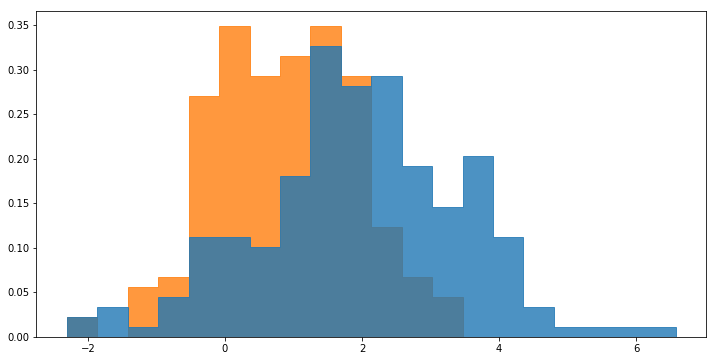

In [6]:
import matplotlib.pylab as plt
plt.figure(figsize=(12,6))
plt.hist((seed,gen), 20, normed=1, alpha=.8,histtype='step', stacked=False, fill=True)
plt.show()

In [7]:
''' SHIT NOTES 

previously we printed the score of what was transformed.. 
graphs = mycascade.fit_transform(graphs,graphss)    
    for g in graphs[:10]:
        for n,d in g.nodes(data=True):
            d['importance_sd']=d['importance'][0]
    draw.graphlearn_layered2(graphs[:10],vertex_label='importance_sd')
''' 

" SHIT NOTES \n\npreviously we printed the score of what was transformed.. \ngraphs = mycascade.fit_transform(graphs,graphss)    \n    for g in graphs[:10]:\n        for n,d in g.nodes(data=True):\n            d['importance_sd']=d['importance'][0]\n    draw.graphlearn_layered2(graphs[:10],vertex_label='importance_sd')\n"

In [9]:
import itertools 
for e in itertools.ifilter(None,[None,3,4]): print e


3
4


In [28]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDClassifier
from eden.graph import vectorize as vectorize
assay_id=651610

from sklearn.utils import shuffle
import mole.clean_make_tasks as cmt
X,y,g,gg,esti=cmt.get_data(assay_id, pos_count=1, neg_count=1)
print y
X=X[:3866*2]
y=y[:3866*2]
X,y = shuffle(X,y)
train_sizes, train_scores_crap, valid_scores = learning_curve( 
    SGDClassifier(average=True, class_weight='balanced', shuffle=True, n_jobs=4, loss='log'), 
    X, 
    y, 
    train_sizes=[50, 75, 100, 150 ,300, 500, 750], 
    cv=5)


Reading from file: PUBCHEM/AID651610_active.sdf
Reading from file: PUBCHEM/AID651610_inactive.sdf
selecting pos graphs: 1/3866 neg graphs in set 1/19293
Reading from file: PUBCHEM/AID651610_active.sdf
Reading from file: PUBCHEM/AID651610_active.sdf
{'active': 3866, 'inactive': 19293}
[ 1  1  1 ..., -1 -1 -1]


In [35]:
x = np.array(train_sizes, dtype=float)
y = [ row.mean() for row in  (valid_scores)]
print y

[0.69569381349218284, 0.72271728993050333, 0.75297725897623602, 0.76215623547974098, 0.81996817660646304, 0.84622247627452352, 0.8702805606533156]


[  0.54569627   0.07104936  19.6878479 ] 1st element is a, second is b -> now its easy to find the x to a y 


/home/smautner/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


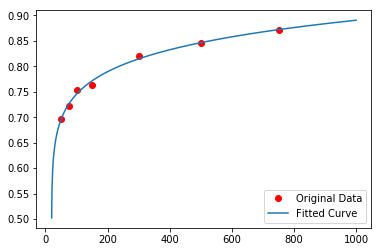

52.9645019123 531.290284746


In [47]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np



plt.plot(x, y, 'ro',label="Original Data")
def func(x, a, b,c):
    return a*((x-c)**b)
popt, pcov = curve_fit(func, x, y)
print popt , "1st element is a, second is b -> now its easy to find the x to a y "

def inverse_func(y,popt):
    a,b,c = popt
    return np.power(y/a,1.0/b)+c

"""
Print the coefficients and plot the funcion.
"""
show_x=np.array(range(0,1000))
plt.plot(show_x, func(show  , *popt), label="Fitted Curve") #same as line above \/
plt.legend(loc='lower right')
plt.show()

print inverse_func(.7,popt), inverse_func(.85,popt)

3.0